<a href="https://colab.research.google.com/github/vicfreire/spectroscopy-Hg-H-Na/blob/main/Na_spectroscopy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.optimize import curve_fit

In [3]:
cd '/content/drive/MyDrive/Espectroscopia de Hg, H e Na/Na - Data'

/content/drive/MyDrive/Espectroscopia de Hg, H e Na/Na - Data


In [4]:
!pwd

/content/drive/MyDrive/Espectroscopia de Hg, H e Na/Na - Data


Reading datasets

In [5]:
f_all = np.loadtxt('Na-8min.txt') # Entire spectrum
f_peak = np.loadtxt('Na-8min-pico.txt') # Main peak focus

df = pd.DataFrame(f_all, columns=['Pixels', 'Count'])
dfp = pd.DataFrame(f_peak, columns=['Pixels', 'Count'])

In [6]:
df.head()

,Pixels,Count
0,0.0,910.0
1,1.0,840.0
2,2.0,886.0
3,3.0,857.0
4,4.0,921.0


In [7]:
dfp.head()

,Pixels,Count
0,0.0,1928.0
1,1.0,1724.0
2,2.0,1825.0
3,3.0,1757.0
4,4.0,1820.0


The 'df' dataset shows all spectroscopy lines, but the main line is saturated (the count goes to zero). To solve this problem there is the 'dfp' dataset that focus on the main line with lower intensity so there is no saturation and because of that all the peaks are less intense. Then, we sum the datasets counts up to obtain only one dataset to analyse.

Plotting 'df' and 'dfp'

In [8]:
fig = px.line(df, x='Pixels', y='Count')
fig

In [9]:
fig2 = px.line(dfp, x='Pixels', y='Count')
fig2

Summing the counts up

In [10]:
# The 'dft' is the total count dataframe.
dft = pd.DataFrame({'Pixels': df['Pixels'], 'Count': df['Count']+dfp['Count']})
dft.head()

,Pixels,Count
0,0.0,2838.0
1,1.0,2564.0
2,2.0,2711.0
3,3.0,2614.0
4,4.0,2741.0


In [11]:
fig3 = px.line(dft, x='Pixels', y='Count')
fig3

Text(0.5, 1.0, 'Sodium Spectra')

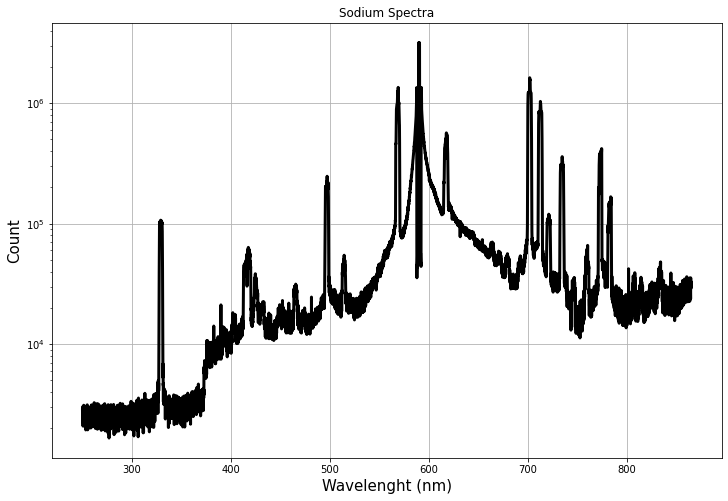

In [17]:
plt.figure(figsize=(12,8))
plt.plot(dft['Wavelenght (nm)'], dft['Count'], color='black', lw=3)
plt.ylabel('Count', fontsize=15)
plt.xlabel('Wavelenght (nm)', fontsize=15)
plt.yscale('log')
plt.grid()
plt.title('Sodium Spectra')

Converting pixels in wavelenght using calibration equation.

For H the calibration equation in this experiment is:

λ = (0.06117 ± 0.0002)x + (250.5 ± 0.8) (nm)

In [12]:
dft['Wavelenght (nm)'] = 0.06117*dft['Pixels']+250.5
dft.head()

,Pixels,Count,Wavelenght (nm)
0,0.0,2838.0,250.50000
1,1.0,2564.0,250.56117
2,2.0,2711.0,250.62234
3,3.0,2614.0,250.68351
4,4.0,2741.0,250.74468


Number of principal lines: 2

Number of difuse lines: 3

Number of sharp lines: 3


In [13]:
espec = px.line(dft, x='Wavelenght (nm)', y='Count', log_y = True)
espec

To fit the spectra it is going to be used the Na_MultiLines.exe genetic algorithm routine and the input file has the following informations as initial guess:

Number of principal lines: 2

Number of difuse lines: 3

Number of sharp lines: 3

**Principal lines:**

4  3.302E-7 m

3  5.900E-7 m

**Difuse lines:**

5  6.175E-7 m

6  5.145E-7 m

7  4.815E-7 m

**Sharp lines:**

4  5.690E-7 m

5  4.972E-7 m

6  4.656E-7 m

The best fitting results are in the output file called FIT-RESULTS.inf, and they are:

The fitted Rydberg constant: 

R = 1.065e+07 m$^{-1}$; σR = 625700 m$^{-1}$

Quantum corrections: 

S = 1.3948; σS = 0.406997 

P = 0.909841; σP = 0.132861

D = 0.0347738; σD = 0.519004

****



The equations that were fitted:

Principal series:


$\frac{1}{λ} = \frac{R}{(3-S)^2}-\frac{R}{(n-P)^2} , n = 3,4,...$

Sharp series:

$\frac{1}{λ} = \frac{R}{(3-P)^2}-\frac{R}{(n-S)^2} , n = 4,5,...$

Difuse series:

$\frac{1}{λ} = \frac{R}{(3-P)^2}-\frac{R}{(n-D)^2} , n = 3,4,...$

****
Perncentage deviation:

In [14]:
# Rydberg constant:

d_R = (abs(1.065e+7 - 1.097e+7)/(1.065e+7))*100
print('Percentage deviation of Rydberg constant:', d_R)

# S:

d_S = (abs(1.3948 - 1.37)/(1.3948))*100
print('Percentage deviation of S:', d_S)

# P:

d_P = (abs(0.90984 - 0.87)/(0.90984))*100
print('Percentage deviation of P:', d_P)

# D:

d_D = (abs(0.0347738 - 0.01)/(0.0347738))*100
print('Percentage deviation of D:', d_D)

Percentage deviation of Rydberg constant: 3.004694835680751
Percentage deviation of S: 1.7780326928591865
Percentage deviation of P: 4.378791875494591
Percentage deviation of D: 71.24271721813548


Now I am going to plot the wavelenght in function of the quantum number **n** for each series.

In [15]:
principal = pd.DataFrame({'n':[3,4],'wavelenght (nm)': [590.0,330.2]})
sharp = pd.DataFrame({'n':[5,6,7],'wavelenght (nm)': [617.5,514.5,481.5]})
difuse = pd.DataFrame({'n':[4,5,6],'wavelenght (nm)': [569.0,497.2,465.6]})

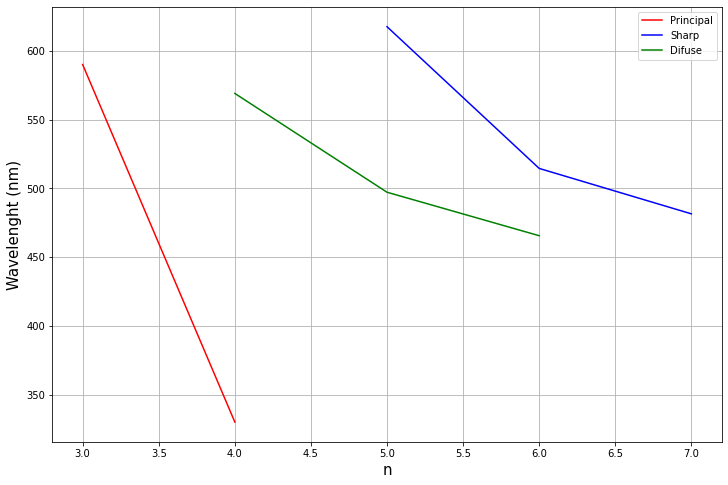

In [19]:
plt.figure(figsize=(12,8))
plt.plot(principal['n'],principal['wavelenght (nm)'], label='Principal', color='red')
plt.plot(sharp['n'],sharp['wavelenght (nm)'], label='Sharp', color='blue')
plt.plot(difuse['n'],difuse['wavelenght (nm)'], label='Difuse', color='green')
plt.grid()
plt.legend()
plt.xlabel('n', fontsize = 15)
plt.ylabel('Wavelenght (nm)', fontsize = 15);